In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt


In [2]:
cities= "Resources/all_cities_years.csv"
weather = "Resources/top_cities_average_weather.csv"

In [3]:
cities_df = pd.read_csv(cities)
del cities_df["Unnamed: 0"]


In [55]:
weather_df = pd.read_csv(weather)
weather_index = weather_df.set_index("City")
weather_transposed = weather_index.T
weather_transposed

City,Cancun,London,Tokyo,Toronto,Mexico City,Amsterdam,Paris,Punta Cana,Vancouver,San Jose del Cabo,Montego Bay
January,75.4,44.2,41.4,25.3,58.3,38.1,40.8,76.6,39.4,66.0,77.2
February,76.6,44.2,42.3,27.3,60.6,38.3,42.1,76.5,40.8,66.6,77.0
March,78.4,47.8,47.7,34.5,64.6,43.0,47.8,77.0,44.4,68.2,78.2
April,81.3,53.6,57.0,46.2,67.3,48.4,52.7,77.9,48.9,71.4,79.3
May,83.7,58.6,64.8,57.4,68.0,55.2,59.4,79.5,55.0,75.2,80.9
June,84.6,64.9,70.5,66.9,66.9,69.7,64.9,81.0,60.3,79.7,82.0
July,85.1,67.3,77.0,72.1,64.8,63.7,68.9,81.5,64.4,83.3,82.5
August,85.5,66.9,79.5,70.7,64.9,63.5,68.5,81.9,64.4,84.0,82.6
September,84.0,63.1,73.0,63.0,64.4,58.5,62.4,81.7,58.8,82.8,82.2
October,81.5,56.3,63.5,51.3,62.8,51.8,55.4,80.6,50.5,79.2,81.3


In [5]:
cities_rename = cities_df.rename(columns={"Destination City":" "})
cities_transp = cities_rename.set_index(" ").T
cities_reset = cities_transp.reset_index()
cities_reset.columns

Index(['index', 'Amsterdam, Netherlands (2013)',
       'Amsterdam, Netherlands (2014)', 'Amsterdam, Netherlands (2015)',
       'Amsterdam, Netherlands (2016)', 'Amsterdam, Netherlands (2017)',
       'Cancun, Mexico (2013)', 'Cancun, Mexico (2014)',
       'Cancun, Mexico (2015)', 'Cancun, Mexico (2016)',
       'Cancun, Mexico (2017)', 'London, United Kingdom (2013)',
       'London, United Kingdom (2014)', 'London, United Kingdom (2015)',
       'London, United Kingdom (2016)', 'London, United Kingdom (2017)',
       'Mexico City, Mexico (2013)', 'Mexico City, Mexico (2014)',
       'Mexico City, Mexico (2015)', 'Mexico City, Mexico (2016)',
       'Mexico City, Mexico (2017)', 'Montego Bay, Jamaica (2013)',
       'Montego Bay, Jamaica (2014)', 'Montego Bay, Jamaica (2015)',
       'Montego Bay, Jamaica (2016)', 'Montego Bay, Jamaica (2017)',
       'Paris, France (2013)', 'Paris, France (2014)', 'Paris, France (2015)',
       'Paris, France (2016)', 'Paris, France (2017)',
      

In [20]:
# averages
cities_reset["Amsterdam(avg)"] = cities_reset[["Amsterdam, Netherlands (2013)","Amsterdam, Netherlands (2014)",
                                 "Amsterdam, Netherlands (2015)","Amsterdam, Netherlands (2016)",
                                 "Amsterdam, Netherlands (2017)"]].mean(axis=1)

cities_reset["Cancun(avg)"] = cities_reset[["Cancun, Mexico (2013)","Cancun, Mexico (2014)",
                                 "Cancun, Mexico (2015)","Cancun, Mexico (2016)",
                                 "Cancun, Mexico (2017)"]].mean(axis=1)


cities_reset["London(avg)"] = cities_reset[["London, United Kingdom (2013)","London, United Kingdom (2014)",
                                 "London, United Kingdom (2015)","London, United Kingdom (2016)",
                                 "London, United Kingdom (2017)"]].mean(axis=1)

cities_reset["Mexico City(avg)"] = cities_reset[["Mexico City, Mexico (2013)","Mexico City, Mexico (2014)",
                                 "Mexico City, Mexico (2015)","Mexico City, Mexico (2016)",
                                 "Mexico City, Mexico (2017)"]].mean(axis=1)

cities_reset["Paris(avg)"] = cities_reset[["Paris, France (2013)","Paris, France (2014)",
                                 "Paris, France (2015)","Paris, France (2016)",
                                 "Paris, France (2017)"]].mean(axis=1)

cities_reset["Punta Cana(avg)"] = cities_reset[["Punta Cana, Dominican Republic (2013)","Punta Cana, Dominican Republic (2014)",
                                 "Punta Cana, Dominican Republic (2015)","Punta Cana, Dominican Republic (2016)",
                                 "Punta Cana, Dominican Republic (2017)"]].mean(axis=1)

cities_reset["San Jose del Cabo(avg)"] = cities_reset[["San Jose del Cabo, Mexico (2013)","San Jose del Cabo, Mexico (2014)",
                                 "San Jose del Cabo, Mexico (2015)","San Jose del Cabo, Mexico (2016)",
                                 "San Jose del Cabo, Mexico (2017)"]].mean(axis=1)

cities_reset["Tokyo(avg)"] = cities_reset[["Tokyo, Japan (2013)","Tokyo, Japan (2014)",
                                 "Tokyo, Japan (2015)","Tokyo, Japan (2016)",
                                 "Tokyo, Japan (2017)"]].mean(axis=1)

cities_reset["Toronto(avg)"] = cities_reset[["Toronto, Canada (2013)","Toronto, Canada (2014)",
                                 "Toronto, Canada (2015)","Toronto, Canada (2016)",
                                 "Toronto, Canada (2017)"]].mean(axis=1)

cities_reset["Vancouver(avg)"] = cities_reset[["Vancouver, Canada (2013)","Vancouver, Canada (2014)",
                                 "Vancouver, Canada (2015)","Vancouver, Canada (2016)",
                                 "Vancouver, Canada (2017)"]].mean(axis=1)

cities_reset["Montego Bay(avg)"] = cities_reset[["Montego Bay, Jamaica (2013)","Montego Bay, Jamaica (2014)",
                                 "Montego Bay, Jamaica (2015)","Montego Bay, Jamaica (2016)",
                                 "Montego Bay, Jamaica (2017)"]].mean(axis=1)

cities_reset

,index,"Amsterdam, Netherlands (2013)","Amsterdam, Netherlands (2014)","Amsterdam, Netherlands (2015)","Amsterdam, Netherlands (2016)","Amsterdam, Netherlands (2017)","Cancun, Mexico (2013)","Cancun, Mexico (2014)","Cancun, Mexico (2015)","Cancun, Mexico (2016)",...,London(avg),Mexico City(avg),Paris(avg),Punta Cana(avg),San Jose de Cabo(avg),Tokyo(avg),Toronto(avg),Vancouver(avg),Montego Bay(avg),San Jose del Cabo(avg)
0,January,89425.0,92024.0,92506.0,90014.0,93557.0,243338.0,271477.0,316600.0,339521.0,...,187661.4,128736.6,83466.2,89834.6,91225.4,197732.2,116941.8,80604.6,84486.2,91225.4
1,February,73576.0,75205.0,73814.0,75229.0,80137.0,260307.0,285503.0,323530.0,348946.0,...,143290.0,107547.8,67376.4,99100.6,100929.2,184500.2,110637.2,76467.4,84194.2,100929.2
2,March,104179.0,103942.0,102489.0,110462.0,118879.0,335126.0,356042.0,386224.0,442569.0,...,207920.6,121466.2,105123.6,127465.8,133882.2,225549.8,137276.8,91708.4,107023.4,133882.2
3,April,124295.0,110880.0,131397.0,144508.0,153882.0,257706.0,291932.0,345307.0,362755.0,...,238232.0,116774.6,118943.2,112788.2,111107.0,170352.6,132203.2,85081.2,98517.4,111107.0
4,May,155463.0,142314.0,158984.0,161621.0,177235.0,262654.0,290454.0,336096.0,345835.0,...,264697.6,123001.6,145812.0,116602.8,103764.6,208884.4,146855.2,112560.2,95684.0,103764.6
5,June,161462.0,148705.0,163851.0,161598.0,175705.0,275327.0,305770.0,363733.0,390589.0,...,297033.6,141108.4,155217.4,146220.2,120193.8,220942.8,143214.8,129728.8,114882.6,120193.8
6,July,148674.0,132277.0,148313.0,147317.0,159835.0,273851.0,322587.0,382935.0,418707.0,...,258365.4,155904.8,140572.2,169855.6,122687.2,208070.8,148652.0,142155.0,129254.0,122687.2
7,August,165006.0,154280.0,168319.0,159403.0,177119.0,235885.0,259315.0,320904.0,321024.0,...,282617.6,144418.8,148760.6,116870.2,93939.2,229965.6,158408.4,142382.8,105513.4,93939.2
8,September,146622.0,150822.0,161552.0,152280.0,168446.0,144330.0,157438.0,194409.0,205865.0,...,271376.8,114915.4,140555.4,57878.2,53041.6,211589.8,143892.0,104048.4,62989.2,53041.6
9,October,127654.0,132861.0,143006.0,137474.0,144774.0,175130.0,209693.0,243101.0,256341.0,...,228461.0,132419.4,119060.0,66417.8,79674.2,203541.8,143263.6,85545.2,72689.4,79674.2


In [57]:
months = ["January","February","March","April","May","June","July","August","September","October","November","December"]
x_axis = np.arange(len(months))
tick_locations = [month for month in x_axis]

In [58]:
can = cities_reset['Cancun(avg)']
lon = cities_reset['London(avg)']
tok = cities_reset['Tokyo(avg)']
mex = cities_reset['Mexico City(avg)']
pun = cities_reset['Punta Cana(avg)']
sjd = cities_reset['San Jose del Cabo(avg)']
tor = cities_reset['Toronto(avg)']
van = cities_reset['Vancouver(avg)']
mtb = cities_reset['Montego Bay(avg)']

In [59]:
can_weather = weather_transposed['Cancun']
ams_weather = weather_transposed['Amsterdam']
lon_weather = weather_transposed['London']
tok_weather = weather_transposed['Tokyo']
mex_weather = weather_transposed['Mexico City']
pun_weather = weather_transposed['Punta Cana']
sjd_weather = weather_transposed['San Jose del Cabo']
tor_weather = weather_transposed['Toronto']
van_weather = weather_transposed['Vancouver']
mtb_weather = weather_transposed['Montego Bay']

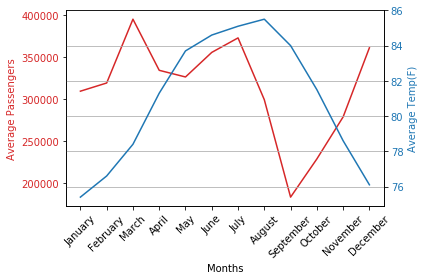

In [60]:
# average passengers vs average weather for CANCUN
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Months')
ax1.set_ylabel('Average Passengers', color=color)
ax1.plot(x_axis, can, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Average Temp(F)', color=color)  # we already handled the x-label with ax1
ax2.plot(x_axis, can_weather, color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.xticks(tick_locations, months)
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
plt.grid(True)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

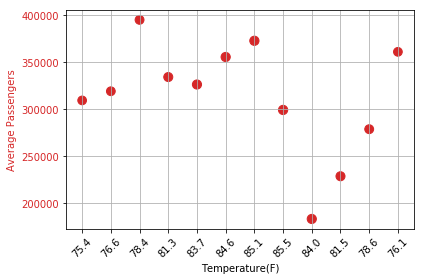

In [62]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Temperature(F)')
ax1.set_ylabel('Average Passengers', color=color)
ax1.scatter(x_axis, can, color=color, s=weather_transposed['Cancun'])
ax1.tick_params(axis='y', labelcolor=color)


plt.xticks(tick_locations, can_weather)
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
plt.grid(True)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()